Movies_Clean Data File - Exploratory Data Analysis (EDA)

Performing EDA will will help give insight to the data, an understanding of the data types, and allow us to determine what features are important and the relationships between them.  We can also test any underlying assumptions during the exploratory phase.

In [38]:
# Import the neccessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [39]:
#Load the data in to a dataframe and review the data
movies_df = pd.read_csv('./Resources/movies_clean.csv', encoding = "ISO-8859-1")
movies_df.head()



,ï»¿Index,original_title,production_budget,worldwide_gross,imbd_id,budget,revenue,genres,producers,director,starring
0,1,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,tt1298650,380000000.0,1.045714e+09,Adventure,Jerry Bruckheimer,Rob Marshall,Johnny Depp
1,2,Avengers: Age of Ultron,365000000,1395316979,tt2395427,280000000.0,1.405404e+09,Action,Kevin Feige,Joss Whedon,Robert Downey Jr.
2,6,Justice League,300000000,655945209,tt0974015,300000000.0,6.579000e+08,Action,Charles Roven,Deborah Snyder,Jon Berg
3,11,John Carter,263700000,282778100,tt0401729,260000000.0,2.841391e+08,Action,Jim Morris,Colin Wilson,Lindsey Collins
4,12,Batman v Superman: Dawn of Justice,263000000,872395091,tt2975590,250000000.0,8.732602e+08,Action,Charles Roven,Deborah Snyder,Zack Snyder


In [40]:
# Dropped Index Column
#movies_df.drop(['ï»¿Index'], axis = 1)
movies_df.drop(movies_df.columns[0], axis = 1, inplace = True)



In [41]:
movies_df.describe(include='all')

,original_title,production_budget,worldwide_gross,imbd_id,budget,revenue,genres,producers,director,starring
count,2983,2.983000e+03,2.983000e+03,2983,2.942000e+03,2.946000e+03,2982,2975,2982,2982
unique,2983,NaN,NaN,2983,NaN,NaN,18,1403,1822,1992
top,Cop Land,NaN,NaN,tt1210166,NaN,NaN,Comedy,Brian Grazer,Gary Lucchesi,Stacey Sher
freq,1,NaN,NaN,1,NaN,NaN,718,27,13,11
mean,NaN,4.301461e+07,1.211710e+08,NaN,4.355535e+07,1.188980e+08,NaN,NaN,NaN,NaN
std,NaN,4.498188e+07,1.943322e+08,NaN,4.457893e+07,1.894694e+08,NaN,NaN,NaN,NaN
min,NaN,9.000000e+03,0.000000e+00,NaN,1.000000e+00,8.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,1.300000e+07,1.635524e+07,NaN,1.300000e+07,1.573590e+07,NaN,NaN,NaN,NaN
50%,NaN,2.900000e+07,5.264995e+07,NaN,3.000000e+07,5.126604e+07,NaN,NaN,NaN,NaN
75%,NaN,5.900000e+07,1.435176e+08,NaN,6.000000e+07,1.401518e+08,NaN,NaN,NaN,NaN


In [42]:
# Shows the numbers of rows and columns

movies_df.shape

(2983, 10)

In [43]:
#Check to see if the dtypes line up to  ake sure the fields with numbers are a numeric data type and text fields are objects 

movies_df.info()

# there are null values in some of these fields and we will need to address them by deciding to drop, fill or ignore them
# Key fields such are the gross, budget, actor/actress, and director will need to get dropped or filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     2983 non-null   object 
 1   production_budget  2983 non-null   int64  
 2   worldwide_gross    2983 non-null   int64  
 3   imbd_id            2983 non-null   object 
 4   budget             2942 non-null   float64
 5   revenue            2946 non-null   float64
 6   genres             2982 non-null   object 
 7   producers          2975 non-null   object 
 8   director           2982 non-null   object 
 9   starring           2982 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 233.2+ KB


In [44]:
# Check for the number of Nulls/Nans
movies_df.isnull().sum()

original_title        0
production_budget     0
worldwide_gross       0
imbd_id               0
budget               41
revenue              37
genres                1
producers             8
director              1
starring              1
dtype: int64

<AxesSubplot:>

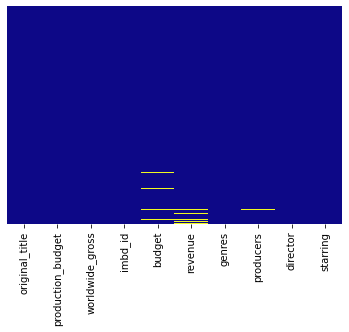

In [45]:
# Visualizing Missing Values
sn.heatmap(movies_df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

#Budget and Revenue has some missing values

In [46]:

At this point we can see that there are 2983 Movies and 10 columns in our dataset
The data types consist of float64(2), int64(2), and objects object(6)
There are some null values in the budget and revenue fields
This is important because we are expecting the budget field to be a significant influencer of the Gross Revenue


SyntaxError: invalid syntax (<ipython-input-46-f82d692ba001>, line 1)

###### How do we want to handle nulls in our budget and gross colums? Drop them? Fill them in from other data sources?  Fill budget in with a mean? 

In [47]:
# Another item to look for in key numeric fields is 0 values

print(movies_df.budget[movies_df.budget==0].count())
print(movies_df.revenue[movies_df.revenue==0].count())

# no zeros in budget or gross columns

0
0


In [48]:
# Filter out rows with a zero to a different dataFrame --- if needed --- might use with NAN later on
# movies_df_0_budget = movies_df[movies_df.budget==0].reset_index(drop=True)

# movies_df = movies_df[movies_df.budget!=0].reset_index(drop=True)


# Check 0 budgets again
# movies_df.budget[df.budget==0].count()

##### do something with release date??  Parse it out with the above code or drop it all together

In [49]:
# Total number of rows and columns
movies_df.shape

# Rows containing duplicate data
duplicate_rows_df = movies_df[movies_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# No Duplicate Rows

number of duplicate rows:  (0, 10)


In [50]:
# Reviewing the unique values in categorical variables  

# ---- not my favorite view, might move this to column breakout analysis and show unique values there

# can scan for an outlier, but the analysis comes later

#print('Movie Name')
#print(*list(movies_df.original_title.unique()))  #to many print to be useful
print('Genre')
print(*list(movies_df.genres.unique()))
print('Revenue')
print(*list(movies_df.revenue.unique()))
print('Worldwide Gross')
print(*list(movies_df.worldwide_gross.unique()))
print('Budget')
print(*list(movies_df.budget.unique()))
print('Production Budget')
print(*list(movies_df.production_budget.unique()))
print('Main Actor/Actress')
print(*list(movies_df.starring.unique()))
print('Director')
print(*list(movies_df.director.unique()))
print('Producer')
print(*list(movies_df.producers.unique()))
#print('Runtime')
#print(*list(movies_df.runtime.unique()))

#Skipped Index and IMDBID

Genre
Adventure Action Family Animation Science Fiction Thriller Drama Fantasy Horror Comedy War History Western Romance Crime Mystery Music Documentary nan
Revenue
1045713802.0 1405403694.0 657900000.0 284139100.0 873260194.0 788241776.0 591794936.0 1153304495.0 933959197.0 958400000.0 1238764765.0 2787965087.0 391081192.0 1084939099.0 794191988.0 586090727.0 1519557910.0 662845518.0 419651413.0 89289910.0 752215857.0 303025485.0 604942143.0 1513528810.0 624026776.0 836297228.0 1091405097.0 459359555.0 310669540.0 550000000.0 372234864.0 1845034188.0 1056057273.0 1028570889.0 1066969703.0 1215439994.0 783766341.0 1025491110.0 743559607.0 747862775.0 705717432.0 559852396.0 769653595.0 371353001.0 219851172.0 304320254.0 1123746996.0 407778013.0 197687603.0 1506249360.0 467365246.0 531865000.0 351040419.0 407602906.0 331926147.0 585174222.0 1004558444.0 786636033.0 538983207.0 566652812.0 343471816.0 504050219.0 854000000.0 758539785.0 258022233.0 356743061.0 185770160.0 90024292.0 183

1045713802 1395316979 655945209 282778100 872395091 1651023152 584899819 1151918521 929411069 959358436 1236703796 2845899541 391081192 1082228107 794861794 591692078 1515100211 667999518 417341288 260002115 757890267 313477717 602893340 1669979967 654213485 836519699 1104054072 459260946 322459006 550517357 367262558 2207986545 1055135598 1025006125 1068879522 1215392272 794697557 1025491110 743455810 747862775 708996336 560155383 757677748 365491792 219535492 69965374 1123794079 409953905 197687603 1514553486 467381584 531861650 353640419 411002906 333771037 585171547 998615789 786635413 554606532 561072059 335673708 1046649706 850482778 758536735 256585882 348902025 180047784 215098356 181982519 542537546 367028980 953554418 852830107 745744980 731463377 383541369 302469017 221229335 405760225 174131329 264246220 139630336 151716815 770882395 621156389 714401889 710644566 312719437 401021746 433058296 300150546 206627518 756244673 648415024 494870992 496511521 651023006 384169424 12

Johnny Depp Robert Downey Jr. Jon Berg Lindsey Collins Zack Snyder Rob Minkoff Byron Howard Joe Russo David Yates Fran Walsh Michael Fottrell James Cameron Gilbert Adler Charles Roven Espen Sandberg Marc Forster Emma Thomas Philip Steuer Gore Verbinski Laura Ziskin Scott Stuber Don Murphy Colin Trevorrow Barry Sonnenfeld Avi Arad Russell Crowe Chris Weitz Simon Emanuel Ellen DeGeneres Tom Hanks Sam Raimi Suzanne Todd Billy Crystal Simon Kinberg Marc Webb Owen Wilson Larry J. Franco Victor Kubicek Martin Campbell Tony Bancroft Sean Daniel Bryan Singer Damon Lindelof Jeremy Kleiner Baz Luhrmann Jon Jashni Raymond Ochoa Jon Favreau Christopher Nolan Harrison Ford Brenda Chapman Lindsey Weber Ron Clements Chris Hemsworth Angelina Jolie Jonathan Glickman Alan Riche Martin Scorsese Dane DeHaan Lilly Wachowski Hutch Parker Jeffrey Silver Amy Poehler David Ayer Ed Asner Bob Ducsay Roger Birnbaum Charles Gordon Tory Tunnell Carl Rinsch Chris Pratt Rick Jaffa Gary Goetzman Rupert Sanders Mario F

Rob Marshall Joss Whedon Deborah Snyder Colin Wilson Roger Allers Nathan Greno Anthony Russo David Barron Zane Weiner Vin Diesel Jon Landau Jon Peters Christopher Nolan Joachim Râânning Barbara Broccoli Andrew Adamson Gore Verbinski Matt Tolmach Brian Goldner Tom DeSanto Patrick Crowley Laurie MacDonald Ralph Winter Brian Grazer Carolynne Cunningham Deborah Forte Allison Shearmur Andrew Stanton Lee Unkrich Shane Black Avi Arad Joe Roth Dan Scanlon Lauren Shuler Donner John Lasseter Mark Gordon Moritz Borman Greg Berlanti Barry Cook Chris Morgan David Dobkin Bryan Burk Dede Gardner Catherine Knapman Thomas Tull Peter Sohn Kevin Feige Charles Roven Steven Spielberg Mark Andrews Mary Parent Roberto Orci John Musker Taika Waititi Robert Stromberg Michael Poryes Timothy Headington Luc Besson Lana Wachowski Bryan Singer Tom Lassally Brigham Taylor Pete Docter Richard Suckle Brian Fee Barry Sonnenfeld Sean Daniel Gary Barber John Davis Joby Harold Eric McLeod James Gunn Jon Favreau Dylan 

In [51]:
## Review data types again now that we have seen the unique values and determine if any need to be changed? 

# Release date needs to be cleaned to be useful
# Year needs to be converted to Category so it isn't treated like a number

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     2983 non-null   object 
 1   production_budget  2983 non-null   int64  
 2   worldwide_gross    2983 non-null   int64  
 3   imbd_id            2983 non-null   object 
 4   budget             2942 non-null   float64
 5   revenue            2946 non-null   float64
 6   genres             2982 non-null   object 
 7   producers          2975 non-null   object 
 8   director           2982 non-null   object 
 9   starring           2982 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 233.2+ KB


In [52]:
# In looking at the unique values there was a movie with a run time of 366 minites whcih seems like an outlier
# Reviewing the row to get more information
# For now it will be left in --------------------------------------------------
# movies_df[movies_df.runtime==366.0]

#No Runtime in this dataset

In [53]:
## Years is showing as an integer and needs to be converted to a category
# movies_df.year=pd.Categorical(movies_df.year)
movies_df.Index=pd.Categorical(movies_df.index)
#no years in this dataset


#### Does anything else need to be converted to categorical?

In [54]:
# Check to see if changes took place
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     2983 non-null   object 
 1   production_budget  2983 non-null   int64  
 2   worldwide_gross    2983 non-null   int64  
 3   imbd_id            2983 non-null   object 
 4   budget             2942 non-null   float64
 5   revenue            2946 non-null   float64
 6   genres             2982 non-null   object 
 7   producers          2975 non-null   object 
 8   director           2982 non-null   object 
 9   starring           2982 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 233.2+ KB


In [55]:
# Display only numeric cloumns
# The describe function provides the count, mean, standard deviation, minimum and maximum values and the quantities of 
# the data.
movies_df.describe().T 


,count,mean,std,min,25%,50%,75%,max
production_budget,2983.0,4.301461e+07,4.498188e+07,9000.0,13000000.0,29000000.0,59000000.0,3.790000e+08
worldwide_gross,2983.0,1.211710e+08,1.943322e+08,0.0,16355237.5,52649951.0,143517634.0,2.845900e+09
budget,2942.0,4.355535e+07,4.457893e+07,1.0,13000000.0,30000000.0,60000000.0,3.800000e+08
revenue,2946.0,1.188980e+08,1.894694e+08,8.0,15735902.0,51266040.0,140151752.5,2.787965e+09


In [56]:
# Display all cloumns
movies_df.describe(include='all').T

# Look at the difference between 75% and Max for Budget

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
original_title,2983,2983,Cop Land,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_budget,2983.0,NaN,NaN,NaN,43014605.044586,44981884.826417,9000.0,13000000.0,29000000.0,59000000.0,379000000.0
worldwide_gross,2983.0,NaN,NaN,NaN,121171034.520617,194332184.887822,0.0,16355237.5,52649951.0,143517634.0,2845899541.0
imbd_id,2983,2983,tt1210166,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,2942.0,NaN,NaN,NaN,43555348.580897,44578927.283908,1.0,13000000.0,30000000.0,60000000.0,380000000.0
revenue,2946.0,NaN,NaN,NaN,118897956.173795,189469384.517833,8.0,15735902.0,51266040.0,140151752.5,2787965087.0
genres,2982,18,Comedy,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
producers,2975,1403,Brian Grazer,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,2982,1822,Gary Lucchesi,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starring,2982,1992,Stacey Sher,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Lets take a look at the movie with a 380m budget
movies_df[movies_df.budget==380000000.0]

,original_title,production_budget,worldwide_gross,imbd_id,budget,revenue,genres,producers,director,starring
0,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,tt1298650,380000000.0,1.045714e+09,Adventure,Jerry Bruckheimer,Rob Marshall,Johnny Depp


In [58]:
# Lets take a look at the movie with a production budget of 379m
movies_df[movies_df.production_budget==379000000.0]

,original_title,production_budget,worldwide_gross,imbd_id,budget,revenue,genres,producers,director,starring
0,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,tt1298650,380000000.0,1.045714e+09,Adventure,Jerry Bruckheimer,Rob Marshall,Johnny Depp


In [59]:
# Lets take a look at the movie with a 2 trillion in Worldwide gross revenue

movies_df[movies_df.worldwide_gross==2845899541.0]

,original_title,production_budget,worldwide_gross,imbd_id,budget,revenue,genres,producers,director,starring
11,Avatar,237000000,2845899541,tt0499549,237000000.0,2.787965e+09,Action,James Cameron,Jon Landau,James Cameron


In [60]:
# Lets take a look at the movie with a 2 trillion in gross revenue

movies_df[movies_df.revenue==2787965087.0]

,original_title,production_budget,worldwide_gross,imbd_id,budget,revenue,genres,producers,director,starring
11,Avatar,237000000,2845899541,tt0499549,237000000.0,2.787965e+09,Action,James Cameron,Jon Landau,James Cameron


In [61]:
# Display all cloumns
# movies_df.describe(include='all')

# Correlation Analysis

<AxesSubplot:>

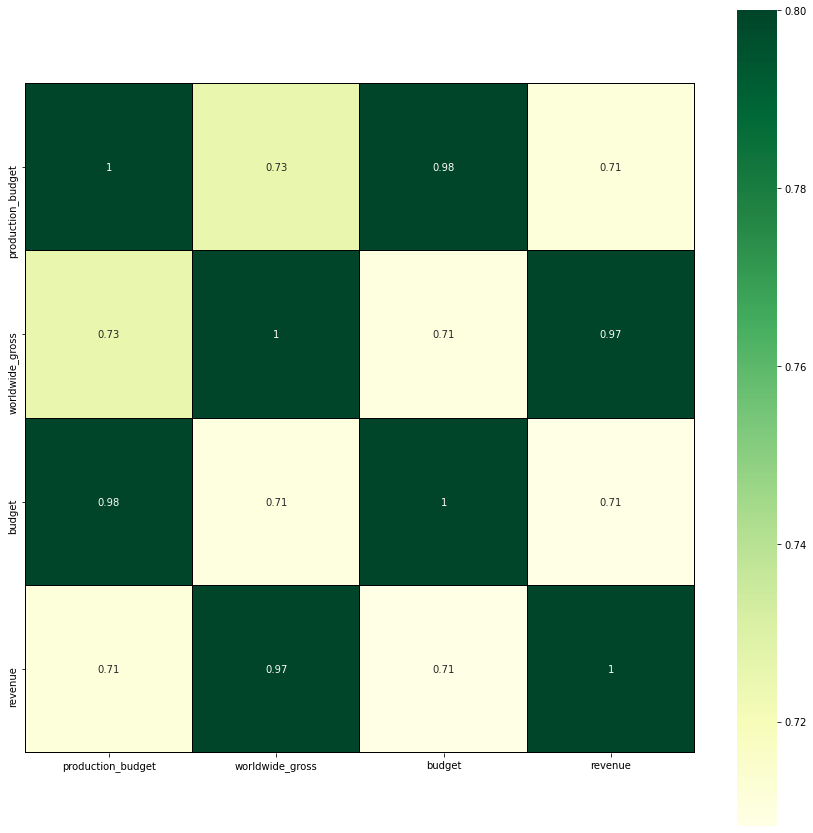

In [62]:
# HeatMaps: are a type of plot which is necessary to find the dependent variables. 
# One of the best ways to find the relationship between the features can be done using heat maps

corr=movies_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='YlGn',linecolor='black')

# Below, positive correlation is represented by dark shades and negative correlation by lighter shades.
# shows if one variable influenced by other variable

# Votes influences revenue the most with a positive correlation of .74
# Budget influences revenue the with a positive correlation of .69

In [63]:
# Numerical Representation of the Correlations
corr = movies_df.corr()
corr

,production_budget,worldwide_gross,budget,revenue
production_budget,1.000000,0.725377,0.974683,0.722492
worldwide_gross,0.725377,1.000000,0.702909,0.983616
budget,0.974683,0.702909,1.000000,0.712243
revenue,0.722492,0.983616,0.712243,1.000000


<AxesSubplot:xlabel='production_budget', ylabel='revenue'>

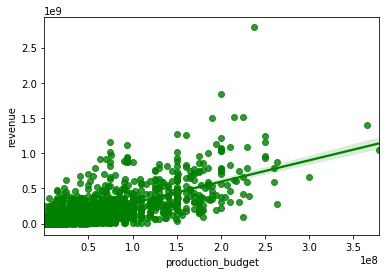

In [65]:
# plots between independent variable - production budget and target variable - gross
sn.regplot(x=movies_df.production_budget, y=movies_df.revenue, color='g')

<AxesSubplot:xlabel='budget', ylabel='revenue'>

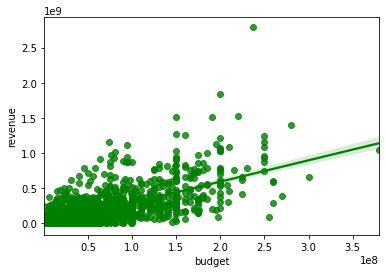

In [66]:
# plots between independent variable - budget  and target variable - revenue
sn.regplot(x=movies_df.budget, y=movies_df.revenue, color='g')

### Need a comment here on the correlation analysis


In [67]:
## Analysis of numeric variables

## Function for finding outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outliers ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

Revenue Analysis

In [68]:
# Analysis on Revenue
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the Gross Revenue

Q1=movies_df.revenue.quantile(.25)
Q3=movies_df.revenue.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.revenue.min())
print("Max Value ",movies_df.revenue.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 8.0
Max Value  2787965087.0
Q1  15735902.0
Q3  140151752.5
IQR  124415850.5
lower_limit -170887873.75
upper_limit 326775528.25


count of outliers  269
Mean  118897956.17379497
Median  51266040.0
Missing values 37
% of Missing values 1.24


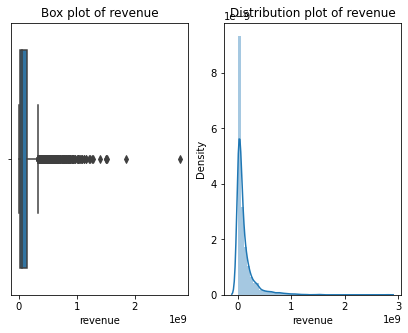

In [69]:
# Revenue Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.revenue)

<AxesSubplot:>

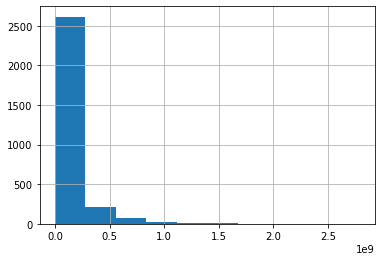

In [70]:
# Gross Histogram — refers to the frequency of occurrence of variables in an interval.
movies_df.revenue.hist()

Text(0, 0.5, 'Number of Movies')

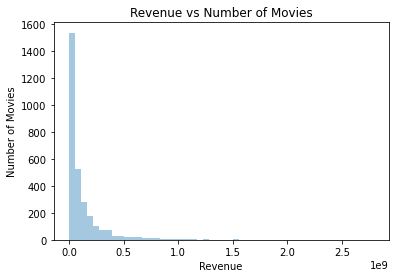

In [71]:
# Revenue vs # of Movies
ax_revenue = sn.distplot(movies_df.revenue,kde=False)
ax_revenue.set_title('Revenue vs Number of Movies')
ax_revenue.set_xlabel('Revenue')
ax_revenue.set_ylabel('Number of Movies')
#plt.savefig("revenue_vs_number_of_movies.png")

Budget Analysis

In [72]:
# Analysis on Budget
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the budget

Q1=movies_df.budget.quantile(.25)
Q3=movies_df.budget.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.budget.min())
print("Max Value ",movies_df.budget.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 1.0
Max Value  380000000.0
Q1  13000000.0
Q3  60000000.0
IQR  47000000.0
lower_limit -57500000.0
upper_limit 130500000.0


count of outliers  177
Mean  43555348.580897346
Median  30000000.0
Missing values 41
% of Missing values 1.37


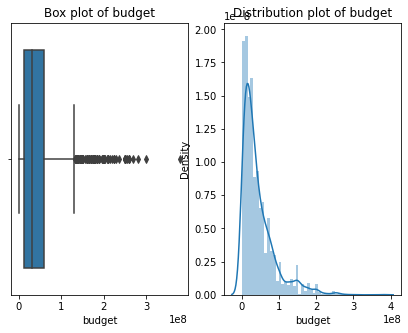

In [73]:
# Budget Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.budget)

<AxesSubplot:>

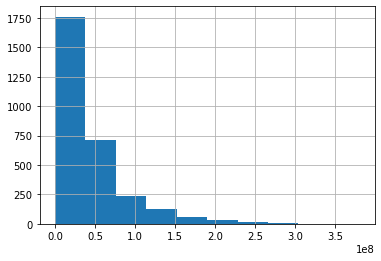

In [74]:
movies_df.budget.hist()
# Histogram — refers to the frequency of occurrence of variables in an interval.

### Histogram  Visualizations

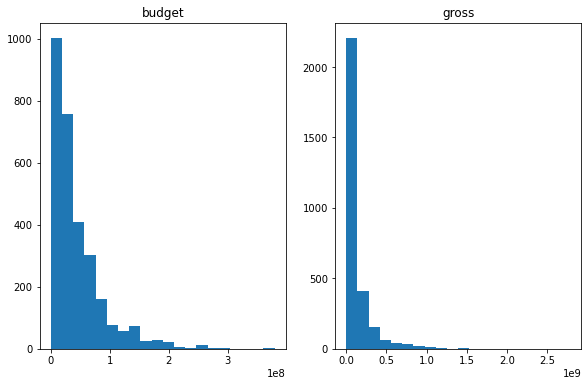

In [78]:
# Using Histograms to to check for outliers in numerical columns
bins = len(movies_df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(movies_df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(movies_df.revenue, bins=20)
plt.title('gross')


plt.show()


Most Movies had a budget below 100M Budgets, Revenue below 200M and a Runtime between 75 and 160 min
Should movies with extreme outliers in one of these categories be dropped?
Leaving in for now...


## Categorical Analysis

In [79]:
movies_df.starring.value_counts()

Stacey Sher          11
Tom Rosenberg        10
1                     9
Scott Rudin           9
Jonathan Glickman     9
                     ..
Michael Schiffer      1
Harry J. Ufland       1
Anjelica Huston       1
Peter R  de vries     1
Benjamin Waisbren     1
Name: starring, Length: 1992, dtype: int64

In [80]:
# in percentage
movies_df.starring.value_counts(normalize=True)
# that Nicolas Cage is .56% 

Stacey Sher          0.003689
Tom Rosenberg        0.003353
1                    0.003018
Scott Rudin          0.003018
Jonathan Glickman    0.003018
                       ...   
Michael Schiffer     0.000335
Harry J. Ufland      0.000335
Anjelica Huston      0.000335
Peter R  de vries    0.000335
Benjamin Waisbren    0.000335
Name: starring, Length: 1992, dtype: float64

In [81]:
# Bar plot for Star Category  - #too many to see something usefull here
# sn.factorplot('starring',data=movies_df,kind='count') 

In [82]:
movies_df.director.value_counts()

Gary Lucchesi         13
Chris Columbus        12
Michael Shamberg      12
Jack Giarraputo       11
Eric Fellner          10
                      ..
Bob Ducsay             1
Charles Lippincott     1
Matthew Cane           1
Jet Li                 1
Todd Solondz           1
Name: director, Length: 1822, dtype: int64

In [83]:
# in percentage
movies_df.director.value_counts(normalize=True)


Gary Lucchesi         0.004359
Chris Columbus        0.004024
Michael Shamberg      0.004024
Jack Giarraputo       0.003689
Eric Fellner          0.003353
                        ...   
Bob Ducsay            0.000335
Charles Lippincott    0.000335
Matthew Cane          0.000335
Jet Li                0.000335
Todd Solondz          0.000335
Name: director, Length: 1822, dtype: float64

In [ ]:
# Bar plot for Director Category  - #too many to see something usefull here
# sn.factorplot('director',data=movies_df,kind='count') 

In [85]:
movies_df.producers.value_counts()

Brian Grazer      27
Neal H. Moritz    26
Joel Silver       26
Scott Rudin       25
John Davis        22
                  ..
Gregory Chou       1
Hilary Henkin      1
Chris Coen         1
Lisa Stewart       1
David Glasser      1
Name: producers, Length: 1403, dtype: int64

#### for actors / directors  should we groups the low volumes together?

In [86]:
# in percentage
movies_df.producers.value_counts(normalize=True)

Brian Grazer      0.009076
Neal H. Moritz    0.008739
Joel Silver       0.008739
Scott Rudin       0.008403
John Davis        0.007395
                    ...   
Gregory Chou      0.000336
Hilary Henkin     0.000336
Chris Coen        0.000336
Lisa Stewart      0.000336
David Glasser     0.000336
Name: producers, Length: 1403, dtype: float64

In [88]:
movies_df["genres"].unique()

array(['Adventure', 'Action', 'Family', 'Animation', 'Science Fiction',
       'Thriller', 'Drama', 'Fantasy', 'Horror', 'Comedy', 'War',
       'History', 'Western', 'Romance', 'Crime', 'Mystery', 'Music',
       'Documentary', nan], dtype=object)

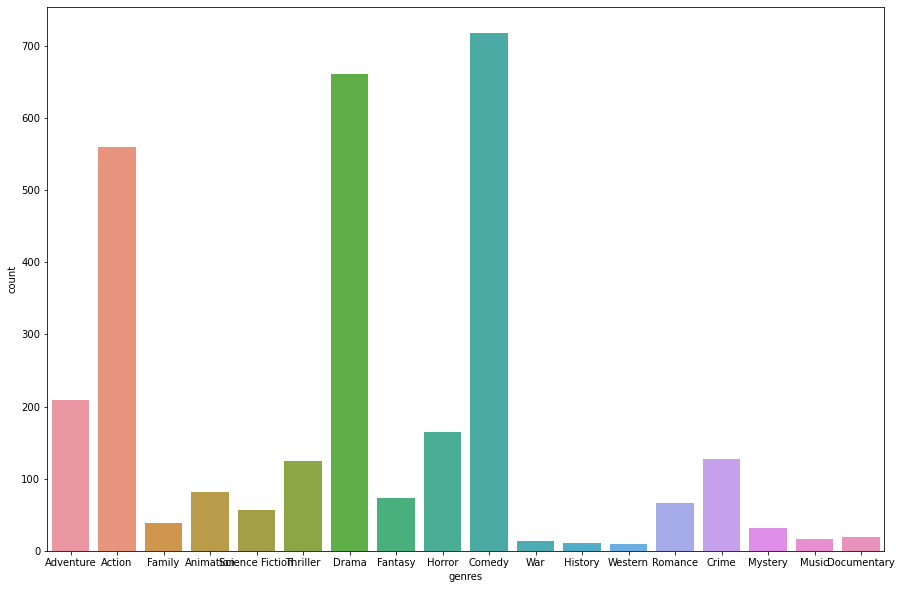

In [91]:
plt.figure(figsize=(15,10))
sn.countplot(x = movies_df["genres"])
plt.show()


18 unique Genre, 
Comedies having the larges number of movies in the dataset, followed by Action and then Drama
These 3 make up more than 50% of all the movies in the dataset


# Data Relationships

In [93]:
# look at relationships between Categories and Revenue
movies_df_strings = movies_df.loc[:, ['director', 'genres', 'original_title', 'starring', 'producers']]
catgs = {}
for i in list(movies_df_strings.columns):
    catgs[i] = movies_df_strings[i].nunique()
    
catgs

{'director': 1822,
 'genres': 18,
 'original_title': 2983,
 'starring': 1992,
 'producers': 1403}

Some Categories have too many values to bar plot - director, name, star and producer


Animation has the highest average among the different Genre, followed by Family and Action.  


Text(0.5, 1.0, 'Revenue vs. Genre of Movie')

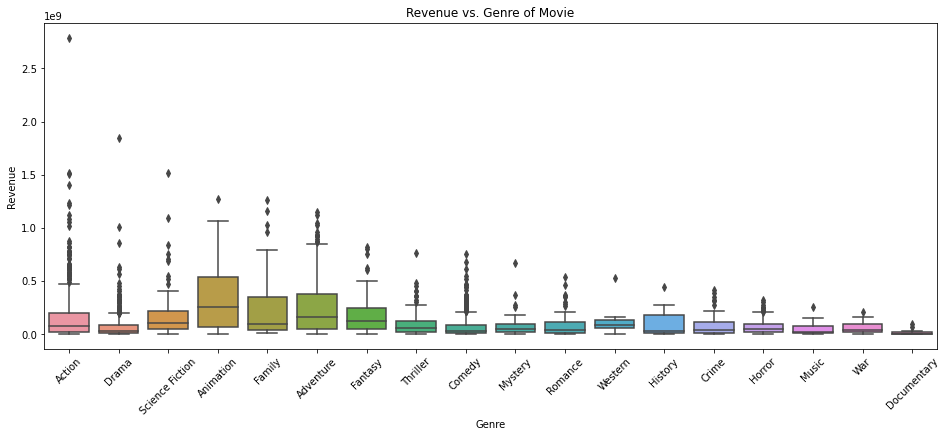

In [96]:
# Genre of movies and Revenue - Box Plot
plt.figure(figsize=(16, 6))
sn.boxplot(x='genres', y='revenue', data=movies_df.sort_values('revenue', ascending=False))
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Revenue vs. Genre of Movie')

Text(0.5, 1.0, 'Budget vs. Revenue')

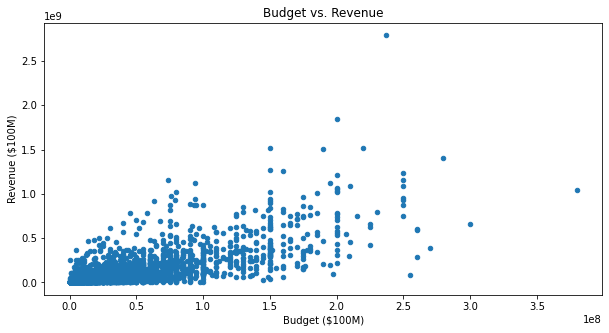

In [97]:
# Scatter PLot - Revenue vs Budget

movies_df.plot.scatter(x='budget', y='revenue', figsize=(10, 5))
plt.xlabel('Budget ($100M)')
plt.ylabel('Revenue ($100M)')
plt.title('Budget vs. Revenue')


This shows a somewhat linear relationship between gross revenue and budget which is not suprise.  
One could assume the more you spend to make a movie the more revenue it might make.


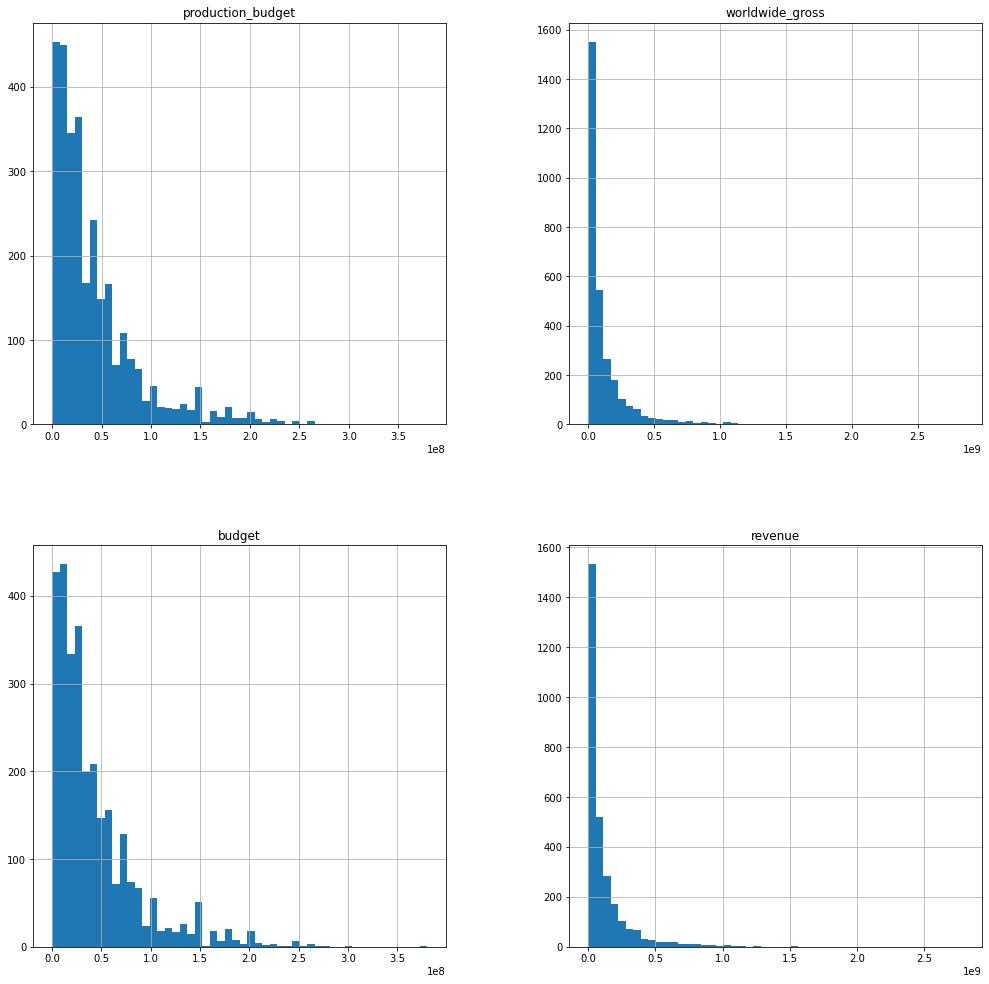

In [98]:
# Distribution Histogram
movies_df.hist(bins=50,figsize=(17,17))
plt.show()

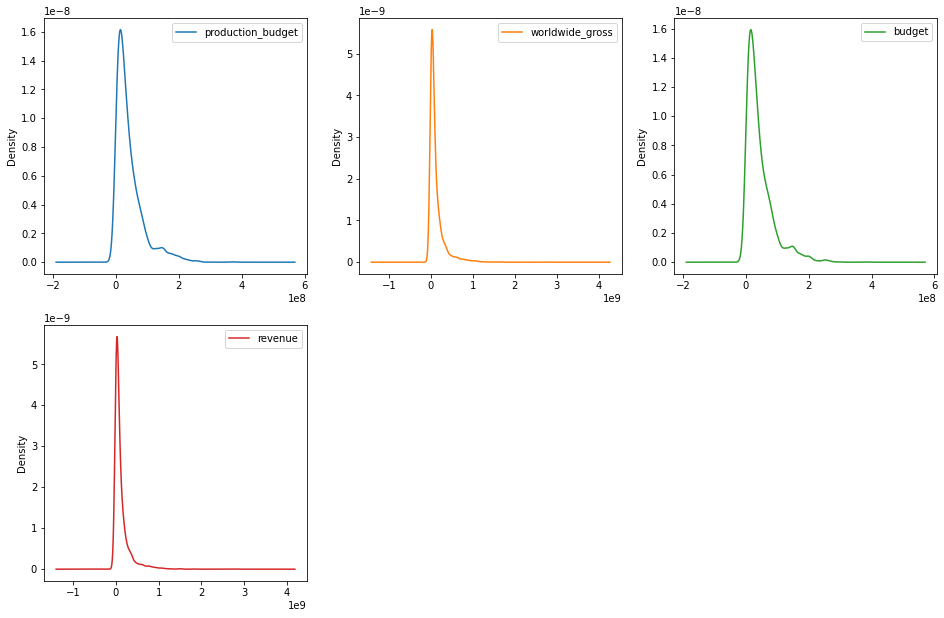

In [99]:
# Distibution - Density
movies_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=10, figsize = (16, 16))
plt.show()


Most Variables seem to be right skewed or positive in relation to our target variable of Gross Revenue
Score seems to be normally distributed


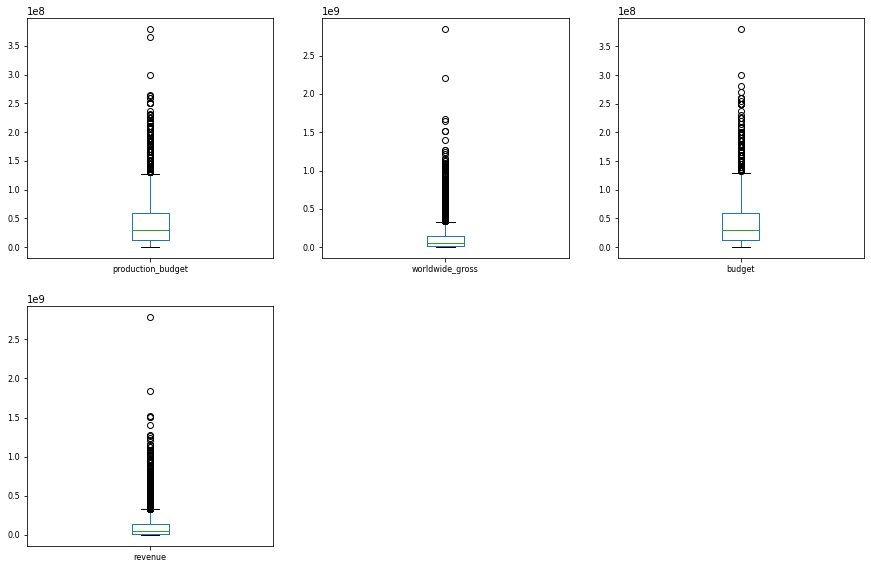

In [100]:
# Box Plot
movies_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

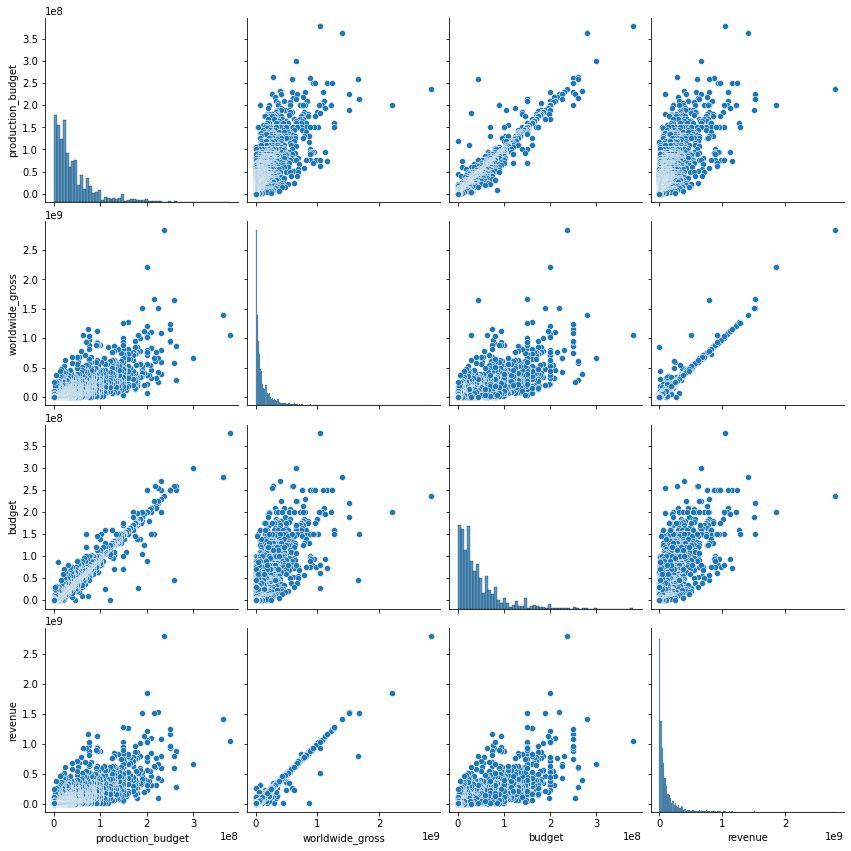

In [101]:
# Scatter Matrix
sn.pairplot(movies_df,height=3) # scatter matrix
plt.show()

Looks to be outliers in all features. 

Text(0, 0.5, 'Budget')

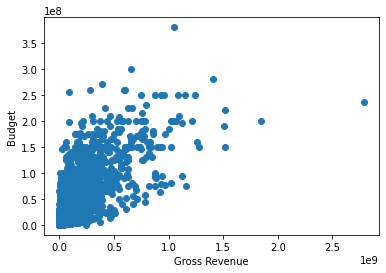

In [103]:
# SCatter of just Gross vs Budget
plt.scatter(movies_df["revenue"],movies_df["budget"])
plt.xlabel("Gross Revenue")
plt.ylabel("Budget")